In [1]:
#importing libraries for pandas, numpy, matplotlib, and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns

In [2]:
#reading data set and slice it into 75% for trainning
df = pd.read_csv("car_price.csv")
n = 75
data = df.head(int(len(df)*(n/100)))
data

,make_model,body_type,Body Color,km,hp,Transmission,Extras,price
0,Audi A3,Station wagon,Orange,5558,85,Manual,"Alloy wheels,Voice Control",5555
1,Audi A1,Sedans,White,115000,85,Manual,"Alloy wheels,Winter tyres",8999
2,Audi A1,Sedans,Black,192000,85,Manual,Alloy wheels,10000
3,Audi A1,Sedans,Red,85000,85,Manual,"Catalytic Converter,Voice Control,Winter tyres",10300
4,Audi A1,Compact,White,130000,85,Manual,Alloy wheels,10490
...,...,...,...,...,...,...,...,...
3595,Audi A3,Sedans,White,0,85,Manual,"Alloy wheels,Voice Control",22680
3596,Audi A1,Sedans,Silver,9544,85,Automatic,"Alloy wheels,Catalytic Converter,Sport package...",22683
3597,Audi A1,Compact,Black,20520,85,Automatic,"Alloy wheels,Sport package,Sport seats,Sport s...",22690
3598,Audi A1,Sedans,Silver,6892,85,Automatic,"Alloy wheels,Shift paddles,Sport seats,Sport s...",22690


In [3]:
#slicing 25% for testing
n=25
fdata = df.tail(int(len(df)*(n/100)))
fdata

,make_model,body_type,Body Color,km,hp,Transmission,Extras,price
3600,Audi A1,Sedans,Green,10,85,Manual,Alloy wheels,22700
3601,Audi A1,Sedans,Grey,1,85,Manual,Alloy wheels,22700
3602,Audi A3,Sedans,Grey,23900,85,Automatic,Alloy wheels,22700
3603,Audi A3,Sedans,Grey,20978,85,Automatic,"Alloy wheels,Sport seats",22700
3604,Audi A3,Sedans,Grey,20978,85,Automatic,"Alloy wheels,Sport seats",22700
...,...,...,...,...,...,...,...,...
4795,Audi A3,Compact,Silver,7,85,Semi-automatic,"Alloy wheels,Roof rack,Sport seats,Sport suspe...",38495
4796,Audi A3,Compact,Grey,7,85,Semi-automatic,"Alloy wheels,Sport seats,Sport suspension",38725
4797,Audi A3,Compact,Grey,7,85,Semi-automatic,"Alloy wheels,Sport seats,Sport suspension",39575
4798,Audi A3,Compact,Grey,750,85,Semi-automatic,"Alloy wheels,Roof rack,Sport seats,Sport suspe...",41495


C:\Users\kotam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

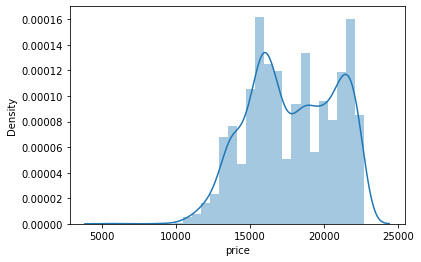

In [5]:
sns.distplot(data['price'])

In [7]:
X_data = df [['km','hp']]
y_data = df[['price']]

In [8]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler().fit(X_data)
data_scaled = scaler.transform(X_data)
X_scaled = data_scaled

In [9]:
scaler = preprocessing.MinMaxScaler().fit(y_data)
data_scaled = scaler.transform(y_data)
y_scaled = data_scaled

In [10]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

kf = KFold(n_splits=10)
i = 1
scores = []
lm = LinearRegression()
for train, test in kf.split(X_scaled):
    print("Fold: {}".format(i))
    X_train, X_test, y_train, y_test = X_scaled[train], X_scaled[test], y_scaled[train], y_scaled[test]
    lm.fit(X_train,y_train)
    score = lm.score(X_test, y_test)
    scores.append(score)
    print(f"Accuracy for the fold no. {i} on the test set: {score}%")
    i += 1

Fold: 1
Accuracy for the fold no. 1 on the test set: -27.58737099593863%
Fold: 2
Accuracy for the fold no. 2 on the test set: -103.45025222056846%
Fold: 3
Accuracy for the fold no. 3 on the test set: -220.54781245597638%
Fold: 4
Accuracy for the fold no. 4 on the test set: -44.47976530372856%
Fold: 5
Accuracy for the fold no. 5 on the test set: -25.25896458165774%
Fold: 6
Accuracy for the fold no. 6 on the test set: -10.416614394041055%
Fold: 7
Accuracy for the fold no. 7 on the test set: -18.545481928209472%
Fold: 8
Accuracy for the fold no. 8 on the test set: -32.1836687278103%
Fold: 9
Accuracy for the fold no. 9 on the test set: -25.897237818204903%
Fold: 10
Accuracy for the fold no. 10 on the test set: -7.53980389080308%


In [41]:
from numpy import mean, std

print('Accuracy: {}'.format(std(scores)))

Accuracy: 61.90360616657324


In [12]:
y_pred = lm.predict(X_test)

Text(0, 0.5, 'Predicted')

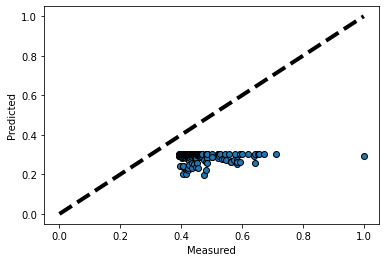

In [13]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_scaled.min(), y_scaled.max()], [y_scaled.min(), y_scaled.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

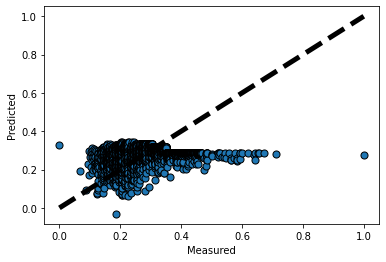

In [53]:
from sklearn.model_selection import cross_val_predict

lr = LinearRegression()
predicted = cross_val_predict(lr, X_scaled, y_scaled, cv=5)

fig, ax = plt.subplots()
ax.scatter(y_scaled, predicted, edgecolors=(0, 0, 0), s=50)
ax.plot([y_scaled.min(), y_scaled.max()], [y_scaled.min(), y_scaled.max()], 'k--', lw=5)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [40]:
from sklearn.model_selection import cross_val_score

linreg = LinearRegression()
scores = cross_val_score(linreg, X_scaled, y_scaled, cv=10, scoring="r2")

print(scores)
print('Accuracy: {} '.format(std(scores)))

[ -27.587371   -103.45025222 -220.54781246  -44.4797653   -25.25896458
  -10.41661439  -18.54548193  -32.18366873  -25.89723782   -7.53980389]
Accuracy: 61.90360616657324 


In [30]:
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test,y_pred)
mae

0.14209742235820144

In [31]:
mse = metrics.mean_squared_error(y_test,y_pred)
mse

0.023373521921480997

In [32]:
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
rmse

0.15288401460414688

In [34]:
df = pd.DataFrame({'Actual':[y_test], 'Predicted':[y_pred]})
df

,Actual,Predicted
0,"[[0.39438124443565137], [0.39440102878623007],...","[[0.3018901262275627], [0.29839486310729785], ..."
